In [1]:
import torch
import torch.nn as nn

# Define the MLP model for regression
class MLPRegression(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_size = 10  # Example input feature size
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1   # Regression output
model = MLPRegression(input_size, hidden_size, output_size)

# Example usage


/Users/junli/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junli/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


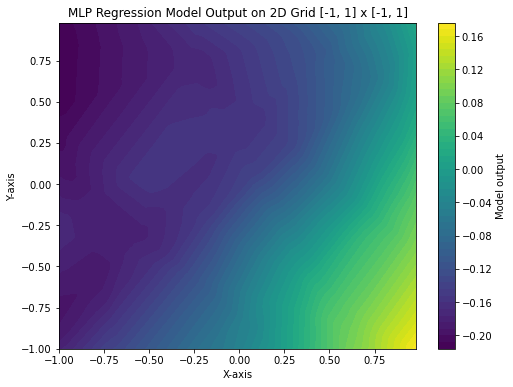

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Adjusted MLP model to take 2D input and produce 1D output
class MLPRegression2D(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, output_size=1):
        super(MLPRegression2D, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model with 2D input and 1D output
model = MLPRegression2D()

# Create a grid of points in the region [-1, 1] x [-1, 1] spaced 0.02 apart
x_values = np.arange(-1, 1, 0.02)
y_values = np.arange(-1, 1, 0.02)
X, Y = np.meshgrid(x_values, y_values)

# Flatten the grid and prepare it as input to the model
grid_points = np.vstack([X.ravel(), Y.ravel()]).T
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# Perform forward pass through the model
output = model(grid_tensor).detach().numpy()

# Reshape the output to the shape of the grid
Z = output.reshape(X.shape)

# Plot the model's output using a color map
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Model output')
plt.title("MLP Regression Model Output on 2D Grid [-1, 1] x [-1, 1]")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()




Epoch 0, Loss: 21.8071
Epoch 1000, Loss: 4.0119
Epoch 2000, Loss: 2.1402
Epoch 3000, Loss: 1.4984
Epoch 4000, Loss: 1.1915


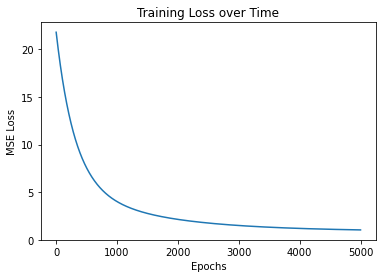

In [3]:
# Re-running the entire code block to fix the missing functions and variables

# Reimport required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Define the MSE loss function and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size)
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Forward pass through the network
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    return Z1, A1, Z2

# Backward pass (compute gradients)
def backward_pass(X, Y, Z1, A1, Z2, W1, W2):
    m = X.shape[1]
    
    # Output layer gradients
    dZ2 = mse_loss_derivative(Y, Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    # Hidden layer gradients
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    return dW1, db1, dW2, db2

# Update parameters using gradient descent
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Generate random 2D input data and corresponding target outputs
np.random.seed(42)
X_train = np.random.randn(2, 500)  # 500 random 2D input samples
y_train = np.sin(3 * X_train[0, :]) + np.cos(3 * X_train[1, :])  # Some non-linear target function
y_train = y_train.reshape(1, -1)  # Reshape for compatibility with MLP output

# Initialize model parameters
input_size = 2
hidden_size = 64
output_size = 1
W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

# Training parameters
learning_rate = 0.01
epochs = 5000

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2 = forward_pass(X_train, W1, b1, W2, b2)
    
    # Compute loss
    loss = mse_loss(y_train, Z2)
    losses.append(loss)
    
    # Backward pass
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, Z2, W1, W2)
    
    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    # Print loss at regular intervals
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot loss over epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.show()


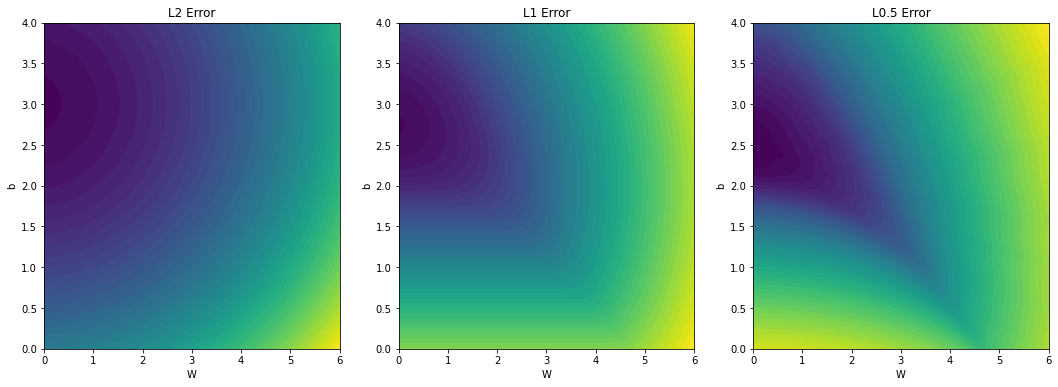

In [6]:
# Reimport the required libraries and definitions
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic training data based on the target function y = 3x + 2
np.random.seed(42)
X_train = np.linspace(-1, 1, 100).reshape(-1, 1)  # 100 data points between -1 and 1
y_train = 3 * X_train ** 2 - 0.3 * X_train + 2 + np.random.normal(0, 0.1, X_train.shape)  # Adding Gaussian noise

# Define the error functions for L2, L1, and L0.5 norms
def L2_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

def L1_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred))

def L05_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred) ** 0.5)

# Define a range of W and b values to evaluate the error for
W_range = np.linspace(0, 6, 50)
b_range = np.linspace(0, 4, 50)

# Initialize matrices to store the errors for each combination of W and b
L2_errors = np.zeros((len(W_range), len(b_range)))
L1_errors = np.zeros((len(W_range), len(b_range)))
L05_errors = np.zeros((len(W_range), len(b_range)))

# Calculate errors for each W and b combination
for i, W in enumerate(W_range):
    for j, b in enumerate(b_range):
        y_pred = W * X_train + b
        L2_errors[i, j] = L2_error(y_train, y_pred)
        L1_errors[i, j] = L1_error(y_train, y_pred)
        L05_errors[i, j] = L05_error(y_train, y_pred)

# Plotting the results: error surfaces for L2, L1, and L0.5
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# L2 error surface
axs[0].contourf(W_range, b_range, L2_errors.T, levels=50, cmap='viridis')
axs[0].set_title('L2 Error')
axs[0].set_xlabel('W')
axs[0].set_ylabel('b')

# L1 error surface
axs[1].contourf(W_range, b_range, L1_errors.T, levels=50, cmap='viridis')
axs[1].set_title('L1 Error')
axs[1].set_xlabel('W')
axs[1].set_ylabel('b')

# L0.5 error surface
axs[2].contourf(W_range, b_range, L05_errors.T, levels=50, cmap='viridis')
axs[2].set_title('L0.5 Error')
axs[2].set_xlabel('W')
axs[2].set_ylabel('b')

plt.show()


In [ ]:
# Toy example of a GPT-like next token prediction task using a small vocabulary and cross-entropy loss

import numpy as np
from scipy.special import softmax

# Define a small vocabulary and example sentence
vocab = {"The": 1, "cat": 2, "sat": 3, "on": 4, "the": 5, "mat": 6}
vocab_size = len(vocab)

# Input sequence: "The cat sat on the"
input_sequence = [1, 2, 3, 4, 5]  # Integer representation of "The cat sat on the"
true_next_token = 6  # "mat"

# Randomly initialized logits (raw scores before softmax) representing the model's output for the next token
# These logits are randomly generated to simulate the model's predictions
logits = np.random.randn(vocab_size)  # One logit per word in the vocabulary

# Apply softmax to convert logits to probabilities
predicted_probs = softmax(logits)

# One-hot encode the true next token "mat"
true_next_token_onehot = np.zeros(vocab_size)
true_next_token_onehot[true_next_token - 1] = 1  # "mat" is at index 5

# Cross-entropy loss function
def cross_entropy_loss(predicted_probs, true_next_token_onehot):
    return -np.sum(true_next_token_onehot * np.log(predicted_probs))

# Compute the cross-entropy loss between the predicted probabilities and the true next token
loss = cross_entropy_loss(predicted_probs, true_next_token_onehot)

loss, predicted_probs
